# Lab 07

##  Solving a boundary value problem with shooting method

### Konks Eric, Б01-818

XI.9.7

$$\epsilon y''=(y')^2,\ \ \ y(0)=1,\ \ \ y(1)=0,\ \ \ 0<\epsilon<<1$$

$$y'=z$$

$$\epsilon z'=(z)^2,\ \ \ z(0)=\alpha,\ \ \ 0<\epsilon<<1$$

In [1]:
import unittest
import logging
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
#logging.basicConfig(level=logging.INFO)

In [3]:
class ODE:
    def __init__(self):
        self.log = logging.getLogger("ODE")
    
    def solve(self, stages, c_vec, b_vec, a, f_vec, u_init, h, t_range):
        u_res = [u_init,]
        t_res = [t_range[0],]
        while t_res[-1] < t_range[1]:
            u_cur = [0 for _ in range(len(f_vec))]
            k = [[0 for _ in range(stages)] for _ in range(len(f_vec))]
            for s in range(stages):
                u_k = [u_res[-1][j]+h*sum(a[s][m]*k[j][m] for m in range(s)) for j in range(len(f_vec))]
                self.log.debug(f"Iter[{t_res[-1]}]: u_k: {u_k}")
                for i in range(len(f_vec)):
                    k[i][s] = f_vec[i](t_res[-1]+c_vec[s]*h, u_k)      

            for i in range(len(f_vec)):
                u_cur[i] = u_res[-1][i]+h*sum(b_vec[s]*k[i][s] for s in range(stages))
            
            self.log.debug(f"Iter[{t_res[-1]}]: k: {k}")
            u_res.append(u_cur)
            t_res.append(t_res[-1]+h)
            
        return (t_res, u_res)

In [4]:
class SM:
    def __init__(self):
        self.log = logging.getLogger("SM")
    
    def stop(self, cur, exp, acc):
        
        if abs(cur - exp) < acc:
            return True
        
        return False
    
    def ode_solve(self, f_vec, u_init, acc):
        c_vec = [1/2-np.sqrt(15)/10, 1/2, 1/2+np.sqrt(15)/10]
        b_vec = [5/18, 4/9, 5/18]
        a = [[5/36,2/9-np.sqrt(15)/15,5/36-np.sqrt(15)/30],
             [5/36+np.sqrt(15)/24,2/9,5/36-np.sqrt(15)/24],
             [5/36+np.sqrt(15)/30,2/9+np.sqrt(15)/15,5/36]]
        t_range = (0, 1)
        h = 0.00001
        ode = ODE()
        c_vec = [0, 1/2, 1/2, 1]
        b_vec = [1/6, 2/6, 2/6, 1/6]
        a = [[0,0,0,0],
             [1/2,0,0,0],
             [0,1/2,0,0],
             [0,0,1,0]]
        res = ode.solve(len(c_vec), c_vec, b_vec, a, f_vec, u_init, h, t_range)
        df = pd.DataFrame({"t": res[0], "(y, y')": res[1]})
        self.log.info(df)
        return res
        
    def solve(self, f_vec, acc, y0, y1):
        a = -1
        delta = 0.001
        res = ()
        y_res = 10*acc
        while not self.stop(y_res, y1, acc):
            self.log.info(f"Alpha: {a}")
            res = self.ode_solve(f_vec, [y0, a], acc)
            res_delta = self.ode_solve(f_vec, [y0, a+delta], acc)
            plt.plot(res[0], [j[0] for j in res[1]], label=f"y(x)|a={a}")
            plt.grid(True)
            plt.xlabel('x')
            plt.ylabel('y')
            plt.legend()
            y_res = res[1][-1][0]
            F = res[1][-1][0] - y1
            F_der = (res_delta[1][-1][0] - res[1][-1][0]) / delta
            a = a - F/F_der

        plt.show()
        return res

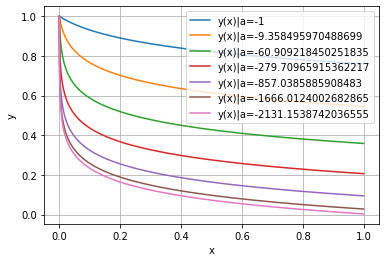

              t                                        (y, y')
0       0.00000                       [1, -2131.1538742036555]
1       0.00001        [0.9806833461020289, -1756.77673942271]
2       0.00002      [0.9644998758169354, -1494.2731945186808]
3       0.00003       [0.9505739526927924, -1300.017878077312]
4       0.00004       [0.938352266177439, -1150.4576573100599]
...         ...                                            ...
99997   0.99997    [0.003300746883178421, -0.0999983078562513]
99998   0.99998   [0.003299746905099656, -0.09999730790009329]
99999   0.99999  [0.0032987469370203523, -0.09999630796393365]
100000  1.00000  [0.0032977469789403106, -0.09999530804777179]
100001  1.00001  [0.0032967470308593303, -0.09999430815160713]

[100002 rows x 2 columns]


In [5]:
e = 0.1
acc = 0.01
y0 = 1
y1 = 0
f1 = lambda t, u_vec: u_vec[1]
f2 = lambda t, u_vec: (u_vec[1]**2)/e

sm = SM()
res = sm.solve([f1, f2], acc, y0, y1)
df = pd.DataFrame({"t": res[0], "(y, y')": res[1]})
print(df)